# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
# Import library untuk analisis data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk model machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Import library untuk menyimpan model
import joblib

# Setting untuk visualisasi yang lebih baik
plt.style.use('ggplot')
sns.set(style='whitegrid')

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [5]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]

try:
    # Opsi 1: Dataset standar hasil clustering
    data_clustering = pd.read_csv('data_clustering.csv')
    df = data_clustering
    print("Dataset data_clustering.csv berhasil dimuat")
except:
    try:
        # Opsi 2: Dataset dengan interpretasi inverse
        data_clustering_inverse = pd.read_csv('data_clustering_inverse.csv')
        df = data_clustering_inverse
        print("Dataset data_clustering_inverse.csv berhasil dimuat")
    except:
        print("Gagal memuat dataset. Pastikan file CSV tersedia di direktori yang sama.")



Dataset data_clustering_inverse.csv berhasil dimuat


In [6]:
# Tampilkan 5 baris pertama dengan function head
print("\nPreview 5 baris pertama dataset:")
df.head()


Preview 5 baris pertama dataset:


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,DurationCategory,Target
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,2,2,2
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,2,1,3
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,3,2,0
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,3,2,2
4,0.006874,2023-10-16 17:51:24,0,1,2,0.435484,3,0.648276,0.0,0.492591,2024-11-04 08:06:39,0,1,1


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
if 'Target' not in df.columns:
    print("Kolom Target tidak ditemukan. Memastikan kolom target benar...")
    # Cek apakah ada kolom 'Cluster' atau kolom lain yang bisa digunakan sebagai target
    if 'Cluster' in df.columns:
        print("Menggunakan kolom 'Cluster' sebagai target")
        df['Target'] = df['Cluster']
    else:
        # Ambil kolom terakhir sebagai target (asumsi)
        target_col = df.columns[-1]
        print(f"Menggunakan kolom '{target_col}' sebagai target")
        df['Target'] = df[target_col]

# Memisahkan fitur dan target
X = df.drop('Target', axis=1)
y = df['Target']

# Jika ada kolom non-numerik pada X, kita perlu menghapusnya
# (selain dari kolom ID yang mungkin ada)
non_numeric_cols = [col for col in X.columns if X[col].dtype == 'object'
                    and col.lower() not in ['id', 'customer_id', 'customerid']]
id_cols = [col for col in X.columns if col.lower() in ['id', 'customer_id', 'customerid']]

if len(non_numeric_cols) > 0:
    print(f"Menghapus kolom non-numerik: {non_numeric_cols}")
    X = X.drop(non_numeric_cols, axis=1)

# Juga menghapus kolom ID jika ada
if len(id_cols) > 0:
    print(f"Menghapus kolom ID: {id_cols}")
    X = X.drop(id_cols, axis=1)

# Periksa untuk menangani nilai yang hilang
if X.isnull().sum().sum() > 0:
    print("Terdapat nilai yang hilang, melakukan pengisian dengan mean...")
    X = X.fillna(X.mean())

# Menggunakan train_test_split() untuk melakukan pembagian dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Ukuran data latih (X_train): {X_train.shape}")
print(f"Ukuran data uji (X_test): {X_test.shape}")
print(f"Jumlah kelas unik pada target: {len(y.unique())}")
print(f"Distribusi kelas target: \n{y.value_counts()}")

Menghapus kolom non-numerik: ['TransactionDate', 'PreviousTransactionDate']
Ukuran data latih (X_train): (1759, 11)
Ukuran data uji (X_test): (755, 11)
Jumlah kelas unik pada target: 4
Distribusi kelas target: 
Target
2    695
0    670
3    592
1    557
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

Decision Tree Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       174

    accuracy                           1.00       755
   macro avg       1.00      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755



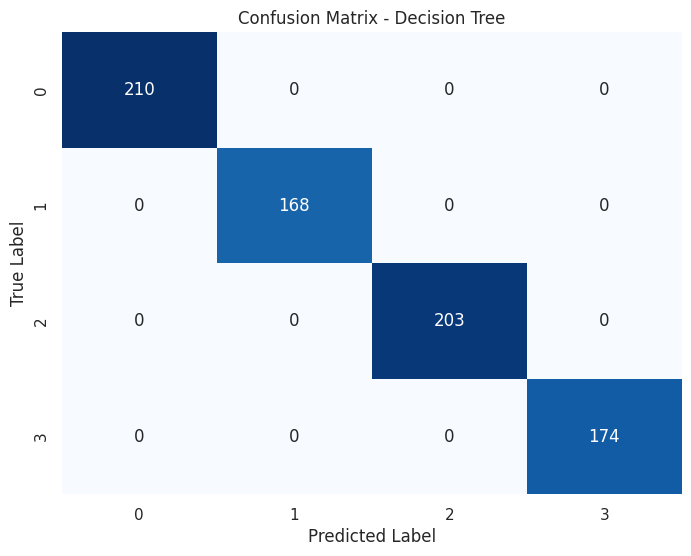

In [8]:
# Buatlah model klasifikasi menggunakan Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model menggunakan data latih
dt_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_dt = dt_model.predict(X_test)

# Mengevaluasi model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Menampilkan hasil evaluasi
print(f"Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [9]:
# Menyimpan Model
# import joblib
# joblib.dump(model, 'decision_tree_model.h5')

joblib.dump(dt_model, 'decision_tree_model.h5')
print("Model Decision Tree berhasil disimpan sebagai 'decision_tree_model.h5'")

Model Decision Tree berhasil disimpan sebagai 'decision_tree_model.h5'


# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [10]:
# Melatih model menggunakan algoritma klasifikasi selain Decision Tree.
# Import algoritma klasifikasi tambahan
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Daftar model klasifikasi untuk diuji
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Inisialisasi dictionary untuk menyimpan hasil metrik
results = {}

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Latih model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Hitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Simpan hasil
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


Training Random Forest...

Training Gradient Boosting...

Training K-Nearest Neighbors...

Training Support Vector Machine...

Training Naive Bayes...


Naive Bayes Metrics:
Accuracy: 0.9828
Precision: 0.9829
Recall: 0.9828
F1 Score: 0.9828
Model Naive Bayes berhasil disimpan


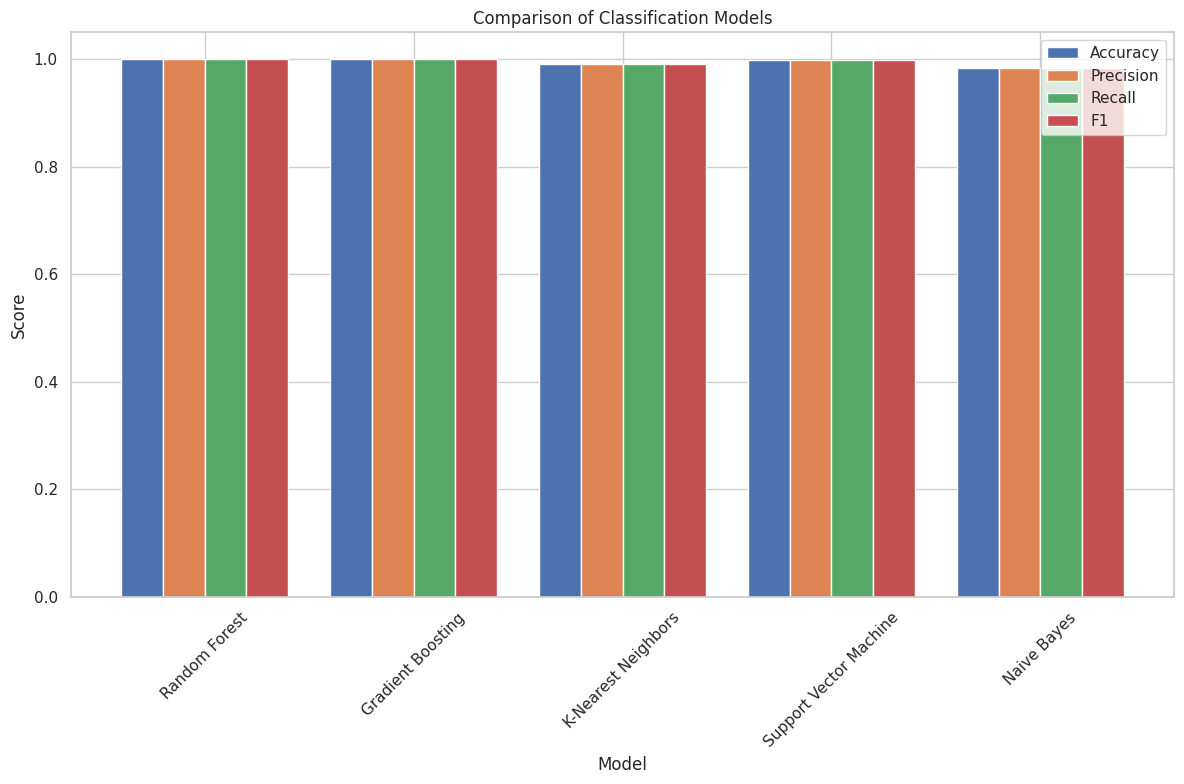

In [16]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.

# Tampilkan hasil evaluasi
print(f"{name} Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Menyimpan model
joblib.dump(model, f'explore_{name.replace(" ", "_").lower()}_classification.h5')
print(f"Model {name} berhasil disimpan")

# Visualisasi perbandingan model
metrics = ['accuracy', 'precision', 'recall', 'f1']
model_names = list(results.keys())

plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(model_names))

for i, metric in enumerate(metrics):
    values = [results[name][metric] for name in model_names]
    plt.bar(index + i * bar_width, values, bar_width, label=metric.capitalize())

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Classification Models')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Model Random Forest berhasil disimpan
Model Gradient Boosting berhasil disimpan
Model K-Nearest Neighbors berhasil disimpan
Model Support Vector Machine berhasil disimpan
Model Naive Bayes berhasil disimpan


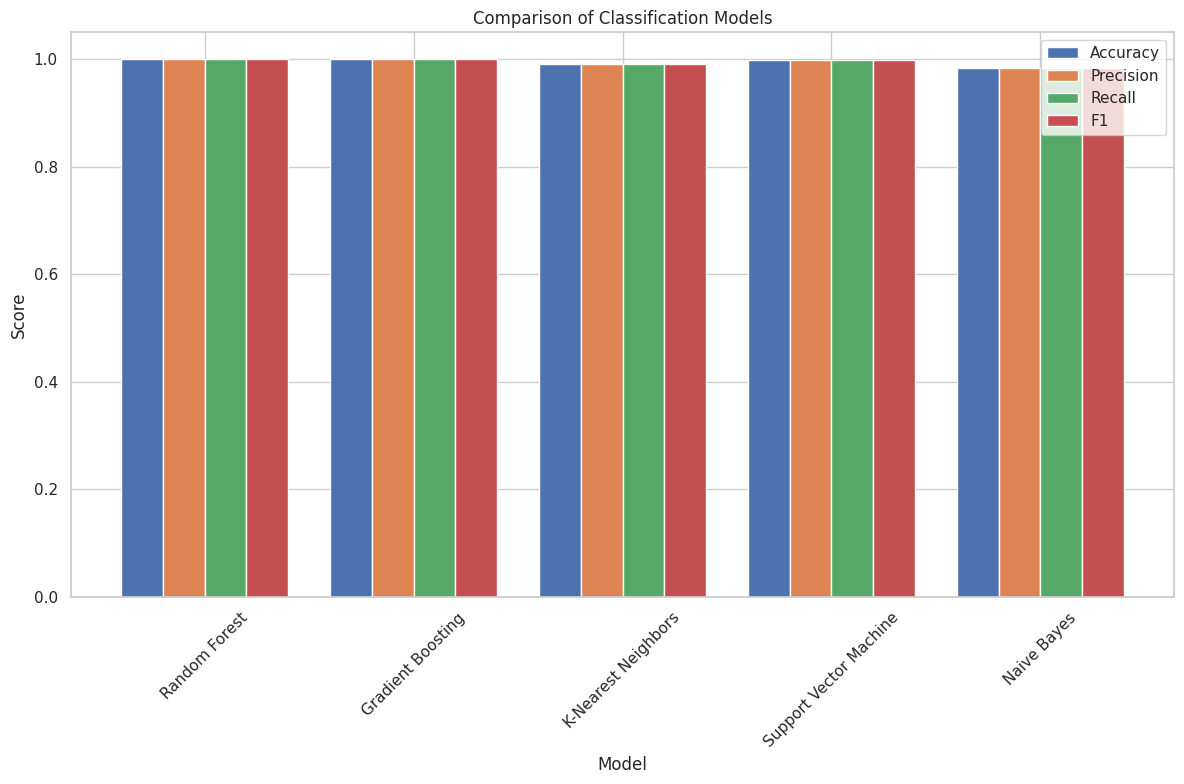


Model terbaik berdasarkan akurasi: Random Forest
Akurasi: 1.0000


In [20]:
# Import library jika belum
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Menyimpan semua model yang ada di dalam dictionary results
for name, model_data in results.items():
    model = model_data['model']  # Mengambil model dari dictionary
    joblib.dump(model, f'explore_{name.replace(" ", "_").lower()}_classification.h5')
    print(f"Model {name} berhasil disimpan")

# Visualisasi perbandingan model
metrics = ['accuracy', 'precision', 'recall', 'f1']
model_names = list(results.keys())

plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(model_names))

for i, metric in enumerate(metrics):
    values = [results[name][metric] for name in model_names]
    plt.bar(index + i * bar_width, values, bar_width, label=metric.capitalize())

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Classification Models')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Menentukan model terbaik berdasarkan akurasi
best_model_name = max(results, key=lambda name: results[name]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nModel terbaik berdasarkan akurasi: {best_model_name}")
print(f"Akurasi: {results[best_model_name]['accuracy']:.4f}")

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [21]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Buat objek GridSearchCV
print("Memulai hyperparameter tuning untuk Random Forest...")
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Gunakan semua core CPU
    verbose=1
)

# Latih GridSearchCV
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("\nParameter terbaik:")
print(grid_search.best_params_)

# Buat model dengan parameter terbaik
best_rf = grid_search.best_estimator_

Memulai hyperparameter tuning untuk Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Parameter terbaik:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}



Metrik Model Random Forest setelah Tuning:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       174

    accuracy                           1.00       755
   macro avg       1.00      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755



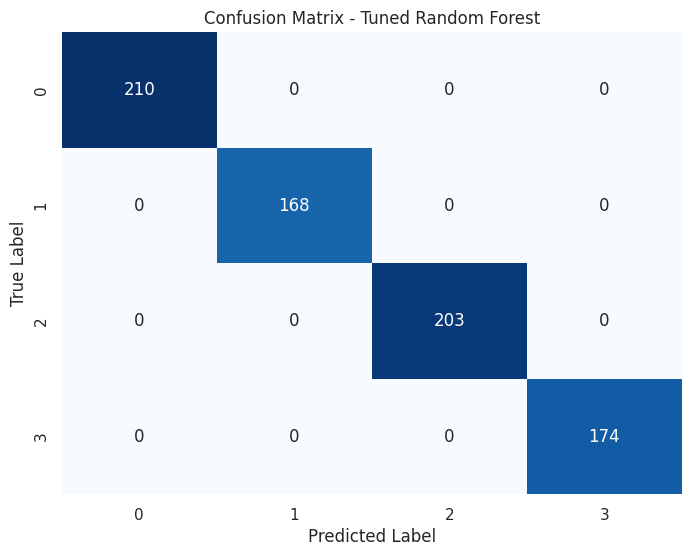


Perbandingan Performa Model:
Model                     Accuracy   Precision  Recall     F1 Score  
-----------------------------------------------------------------
Decision Tree             1.0000 1.0000 1.0000 1.0000
Random Forest (Tuned)     1.0000 1.0000 1.0000 1.0000


In [22]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
# Evaluasi model hasil tuning
y_pred_tuned = best_rf.predict(X_test)

# Hitung metrik
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

# Tampilkan hasil evaluasi
print("\nMetrik Model Random Forest setelah Tuning:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1 Score: {f1_tuned:.4f}")

# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.show()

# Bandingkan dengan model Decision Tree awal
print("\nPerbandingan Performa Model:")
print(f"{'Model':<25} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1 Score':<10}")
print("-" * 65)
print(f"{'Decision Tree':<25} {accuracy_dt:.4f} {precision_dt:.4f} {recall_dt:.4f} {f1_dt:.4f}")
print(f"{'Random Forest (Tuned)':<25} {accuracy_tuned:.4f} {precision_tuned:.4f} {recall_tuned:.4f} {f1_tuned:.4f}")




Model hasil tuning berhasil disimpan sebagai 'tuning_classification.h5'


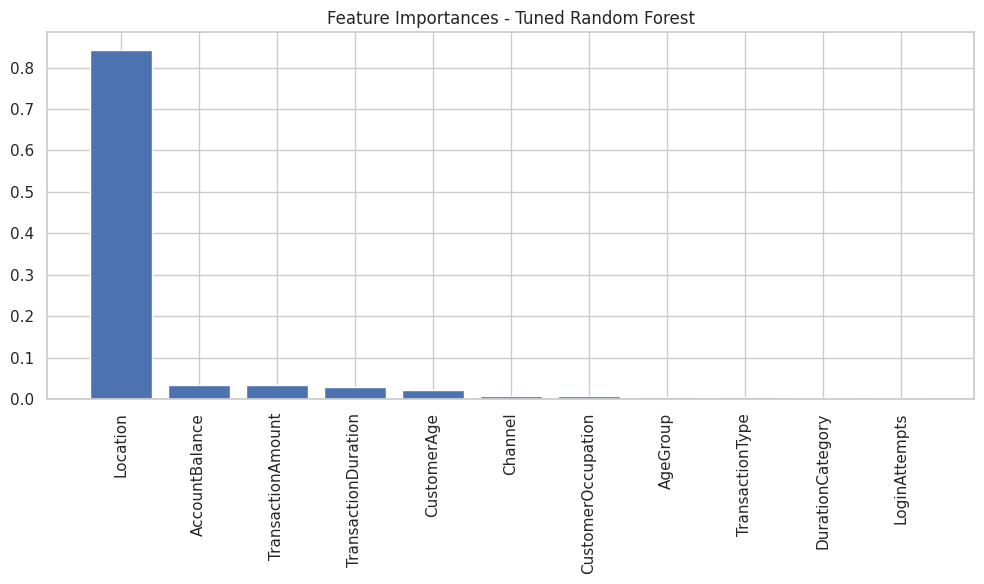

In [23]:
# Menyimpan Model hasil tuning
# import joblib
# joblib.dump(model_dt, 'tuning_classification.h5')

# Menyimpan model hasil tuning
joblib.dump(best_rf, 'tuning_classification.h5')
print("\nModel hasil tuning berhasil disimpan sebagai 'tuning_classification.h5'")

# Visualisasi feature importance dari model tuning
plt.figure(figsize=(10, 6))
feature_importances = best_rf.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.title('Feature Importances - Tuned Random Forest')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()